In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
random_state = 2

# 1. Implementation and test of perceptron model

## Generate and visualize a database S such that

In [27]:
# loading the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
#looking for null data
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
df.drop(axis=1,columns='Unnamed: 32',inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
# our target is diagnosis, so we divede our data in X,y X: input space , y is the target
X , y = df.iloc[:,2:],df.iloc[:,1]

/tmp/ipykernel_87896/1845359377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'target'] = y


<Axes: xlabel='perimeter_worst', ylabel='area_worst'>

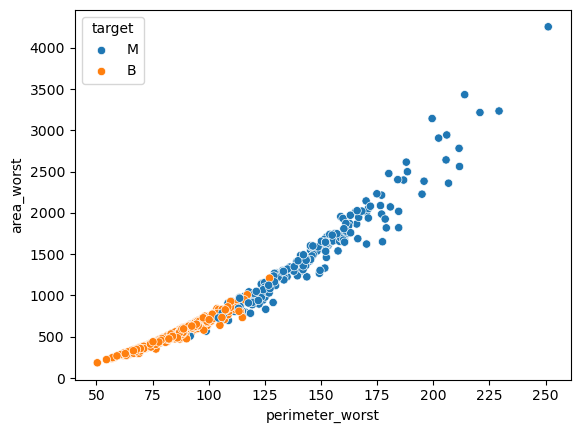

In [31]:
# getting the index of the two major mutual information between two features and the target
indices_maximos = np.argsort(mutual_info_classif(X,y))[-2:][::-1]
data = X.iloc[:,indices_maximos]
data.loc[:,'target'] = y
sb.scatterplot(data=data,x='perimeter_worst',y='area_worst',hue='target')

In [32]:
data.target.value_counts()

target
B    357
M    212
Name: count, dtype: int64

## Shuffle the dataset S and randomly subdivide it into disjoint sets Dtr and Dte for training and test, respectively. 
OBS: Verify if the classes $C_1$ and $C_2$ are balanced in $D_{tr}$ and $D_{te}$.

<Axes: xlabel='perimeter_worst', ylabel='area_worst'>

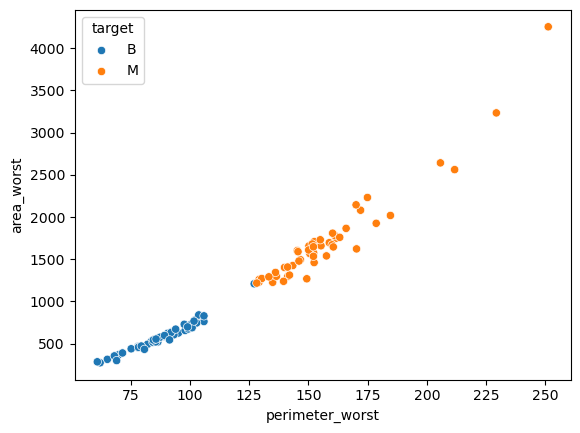

In [33]:
# filter and picking 50 samples for each label of the target 

data_filtrado_1 = data[data["perimeter_worst"] < 110].sample(n=50, random_state=random_state)  
data_filtrado_2 = data[data["area_worst"] > 1200].sample(n=50, random_state=random_state)  

# join the two filters
data_sample = pd.concat([data_filtrado_1, data_filtrado_2]).reset_index(drop=True)

sb.scatterplot(data=data_sample,x='perimeter_worst',y='area_worst',hue='target')

In [34]:
data_sample.target.value_counts()

target
B    50
M    50
Name: count, dtype: int64

In [35]:
X , y = data_sample.iloc[:,:-1], data_sample.iloc[:,-1]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=random_state,stratify=y)

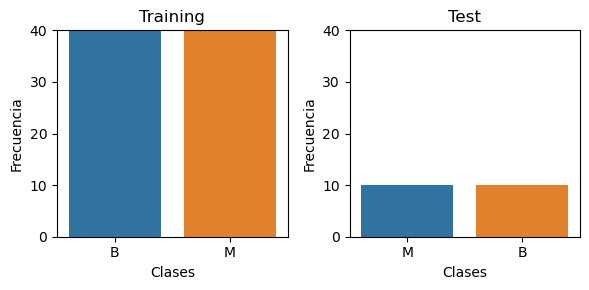

In [38]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

y_max = max(train_counts.max(), test_counts.max())
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plotting the value counts of y_train
sb.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0],hue=train_counts.index)
axes[0].set_title("Training")
axes[0].set_xlabel("Clases")
axes[0].set_ylabel("Frecuencia")
axes[0].set_ylim(0, y_max)  

# Plotting the value counts of y_test
sb.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1],hue=test_counts.index)
axes[1].set_title("Test")
axes[1].set_xlabel("Clases")
axes[1].set_ylabel("Frecuencia")
axes[1].set_ylim(0, y_max)  

plt.tight_layout()
plt.show()

In [39]:
y_train.loc[y_train=='M']=1.0
y_train.loc[y_train=='B']=0.0
y_test.loc[y_test=='M']=1.0
y_test.loc[y_test=='B']=0.0

## Implement the perceptron using numpy

In [40]:
class Perceptron:
    def __init__(self,input_size,mu=0.001,epochs=100):
        self.W = np.zeros(input_size+1)
        self.mu = mu
        self.epochs = epochs

    def ativation(self,x):
        return 1 / (1 + np.exp(-x))
        
    
    def train(self,X,y):
        epoch_errors = []
        for epoch in range(self.epochs):
            errors = 0
            X_biased = np.c_[np.ones(X.shape[0]),X]
            for xi, target in zip(X_biased,y):
                net_input = np.dot(xi,self.W)
                y_chapeu = self.ativation(net_input)
                error = target - y_chapeu
                if error != 0:
                    self.W += self.mu * error * xi
                    errors +=1
            
            epoch_errors.append(errors)
            if errors == 0:
                print(f'converged {epoch+1} epochs')
                break
        return epoch_errors
    
    def predict(self,X):
        X_biased = np.c_[np.ones(X.shape[0]),X]
        net_input = np.dot(X_biased,self.W)
        predictions = np.array([self.ativation(net) for net in net_input])     
        return predictions  

In [41]:
# Create and train perceptron
perceptron = Perceptron(input_size=2, mu=0.1, epochs=100)
errors = perceptron.train(X_train, y_train)

# Print final weights
print(f"Final weights (bias, w1, w2): {perceptron.W}")

Final weights (bias, w1, w2): [1.60435149 3.28640579 3.8733972 ]


In [42]:

# Test the perceptron
print("\nPredictions:")
predictions = perceptron.predict(X_test)
for x_i, pred, actual in zip(X_test, predictions, y_test):
    print(f"Input: {x_i}, Predicted: {pred}, Actual: {actual}")



Predictions:
Input: [1.21341429 1.47029965], Predicted: 0.9999874675626752, Actual: 1.0
Input: [-1.30331245 -1.10138381], Predicted: 0.0009625523925997089, Actual: 0.0
Input: [1.57746594 1.28789021], Predicted: 0.9999923213185353, Actual: 1.0
Input: [2.10722386 2.18980352], Predicted: 0.9999999590749314, Actual: 1.0
Input: [0.95983348 0.78409274], Predicted: 0.9995887329301644, Actual: 1.0
Input: [-1.26138374 -1.06982408], Predicted: 0.0012480539623941362, Actual: 0.0
Input: [-0.90637061 -0.83167843], Predicted: 0.009993555160367703, Actual: 0.0
Input: [0.2894763  0.23541674], Predicted: 0.9697502496906403, Actual: 1.0
Input: [-0.50390523 -0.52418825], Predicted: 0.11085129475566158, Actual: 0.0
Input: [0.7690202  0.48007701], Predicted: 0.9975055585646052, Actual: 1.0
Input: [0.13381283 0.11670584], Predicted: 0.9238723834423791, Actual: 0.0
Input: [-1.16949208 -0.99859754], Predicted: 0.0022221865463733755, Actual: 0.0
Input: [3.24959284 4.5234861 ], Predicted: 0.9999999999998863, A

In [43]:
def plot_decision_boundary(perceptron, X, y):
    # Plot the decision boundary
    plt.figure(figsize=(6, 3),dpi=150)
    
    # Plot the training points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
    
    # Define a grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Compute predictions for all grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Plot the decision boundary line
    w1, w2, b = perceptron.W[1], perceptron.W[2], perceptron.W[0]
    if w2 != 0:
        slope = -w1 / w2
        intercept = -b / w2
        x_vals = np.array([x_min, x_max])
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
    
    plt.xlabel('perimeter_worst')
    plt.ylabel('area_worst')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.tight_layout()
    plt.show()

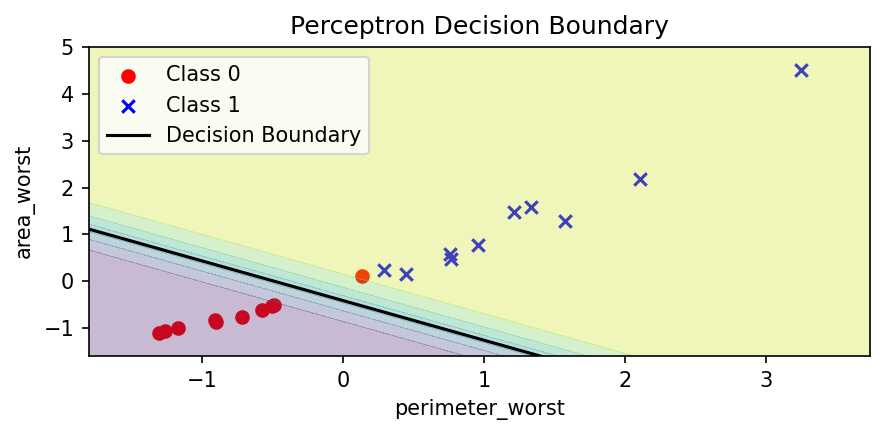

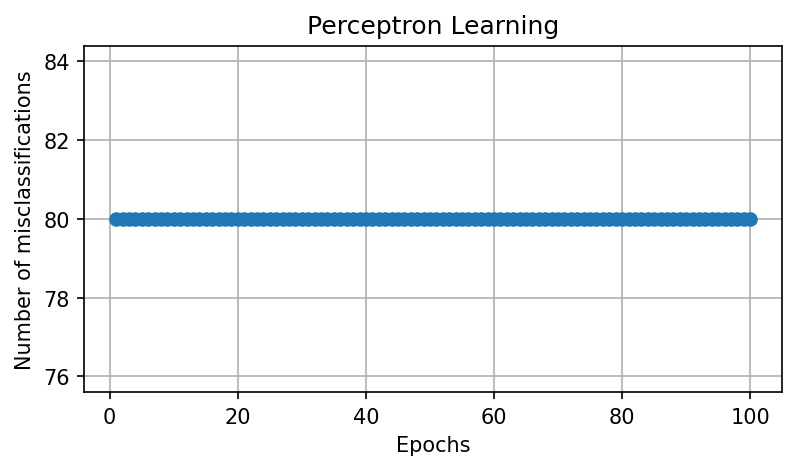

In [44]:

# Plot decision boundary
plot_decision_boundary(perceptron, X_test, y_test)

# Plot errors per epoch
plt.figure(figsize=(6, 3),dpi=150)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.grid(True)
plt.show()


## Evaluate the model using the accuracy measure (section 8.6) computed over $D_{te}$.

In [45]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [46]:
cm = confusion_matrix((y_test).astype('int'),(predictions).astype('int'))
cm

array([[10,  0],
       [10,  0]])

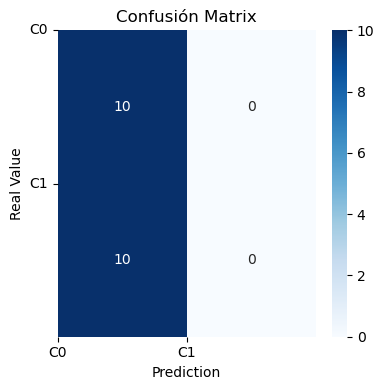

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['C0', 'C1']

# Con seaborn
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

# Con matplotlib básico
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.yticks(rotation=0)
plt.ylabel('Real Value')
plt.xlabel('Prediction')
plt.title('Confusión Matrix')
plt.tight_layout()
plt.show()

In [48]:
accuracy_score((y_test).astype('int'),(predictions).astype('int'))

0.5